### This is a minimal working "starter" notebook for the [[U-tad] Dogs vs. Cats 2024](https://www.kaggle.com/competitions/u-tad-dogs-vs-cats-2024) competition.
Click on **Copy & Edit** to copy this notebook to your account and start working.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import data as tf_data
import keras

seed = 42
keras.utils.set_random_seed(seed)

### Read in the training data

In [2]:
image_size = (128, 128)

# when working with 20_000 files for training this
# will lead to exactly 160 mini-batches per epoch
batch_size = 125

# https://keras.io/api/data_loading/image/#imagedatasetfromdirectory-function
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    #"PetImages",
    "/kaggle/input/u-tad-dogs-vs-cats-2024/train/train",
    validation_split=0.2,
    subset="both",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


### A basic sequential CNN model

In [3]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Input(shape=image_size + (3,)))  # Tamaño de imagen de entrada

# Capas convolucionales y de pooling
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Nueva capa de convolución adicional
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5)) 

# Capas densas
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Capa de salida

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,635,842 (6.24 MB)

 Trainable params: 1,635,842 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and train (fit)

In [4]:
%%time

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001,
                                                 momentum=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 12

history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epochs,)

Epoch 1/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 617s 4s/step - accuracy: 0.5049 - loss: 3.6293 - val_accuracy: 0.5134 - val_loss: 0.6924
Epoch 2/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 606s 4s/step - accuracy: 0.5271 - loss: 0.6936 - val_accuracy: 0.5420 - val_loss: 0.6858
Epoch 3/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 629s 4s/step - accuracy: 0.5471 - loss: 0.6889 - val_accuracy: 0.6700 - val_loss: 0.6431
Epoch 4/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 606s 4s/step - accuracy: 0.6273 - loss: 0.6555 - val_accuracy: 0.4976 - val_loss: 0.6944
Epoch 5/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 612s 4s/step - accuracy: 0.6560 - loss: 0.6277 - val_accuracy: 0.7394 - val_loss: 0.5280
Epoch 6/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 610s 4s/step - accuracy: 0.7257 - loss: 0.5629 - val_accuracy: 0.7314 - val_loss: 0.5373
Epoch 7/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.7548 - loss: 0.5103 - val_accuracy: 0.8126 - val_loss: 0.4089
Epoch 8/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 607s 4s/step - accuracy: 0.7837 - loss: 0.4719 - val_accu

### Plot the learning curves

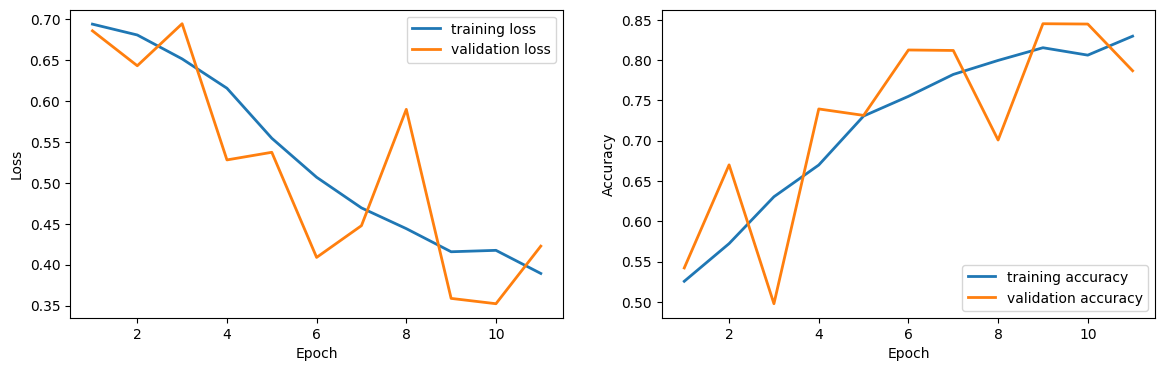

In [5]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"accuracy"], lw=2, label='training accuracy')
plt.plot(logs.loc[1:,"val_accuracy"], lw=2, label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

### Save the trained model

In [6]:
model.save("model.keras")

### Evaluate model performance using the `supplementary_data`

In [7]:
supplementary_ds = keras.utils.image_dataset_from_directory(
    #"PetImages",
    "/kaggle/input/u-tad-dogs-vs-cats-2024/supplementary_data/supplementary_data",
    image_size=image_size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
)

model.evaluate(supplementary_ds,
               return_dict=True,
               verbose=1)

Found 300 files belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5720 - loss: 0.8430


{'accuracy': 0.550000011920929, 'loss': 0.8669509887695312}

### Create predictions for all of the test images
(Do not modify this section)

In [8]:
%%time

import pandas as pd

# Directorio de imágenes de prueba
folder_path = "/kaggle/input/u-tad-dogs-vs-cats-2024/test/test"
predictions_dict = {}

for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    
    # Nombre de la imagen
    file_name = img.split('/')[-1]
    file_no_extension = file_name.split('.')[0]
    
    # Procesar la imagen
    img = keras.utils.load_img(img, target_size=image_size)
    img_array = keras.utils.img_to_array(img)
    img_array = keras.ops.expand_dims(img_array, 0)
    prediction = model.predict(img_array, verbose=None)
    label = np.argmax(prediction)

    # Guardar las predicciones en el diccionario
    predictions_dict[int(file_no_extension)] = label

# Convertir las predicciones en un DataFrame
predictions_df = pd.DataFrame(predictions_dict.items(), columns=["id", "label"])

# Ordenar el DataFrame por el ID de la imagen
predictions_df = predictions_df.sort_values(by='id', ascending=True)

# Guardar las predicciones en un archivo CSV
predictions_df.to_csv('predictions.csv', index=False)

print("Predicciones guardadas en predictions.csv")


Predicciones guardadas en predictions.csv
CPU times: user 2min 47s, sys: 12.2 s, total: 2min 59s
Wall time: 3min 4s


### Save your predictions to a competition submission file

In [9]:
submission = pd.DataFrame(predictions_dict.items(), columns=["id", "label"]).sort_values(by='id', ascending=True)
submission.to_csv('submission.csv',index=False)

# print numbers of each class label
submission["label"].value_counts()

label
0    790
1    277
Name: count, dtype: int64